### **Clase base abstracta KNNBase**

In [28]:
from abc import ABC, abstractmethod

class KNNBase(ABC):
    @abstractmethod
    def fit(self, x, y):
        pass
    
    @abstractmethod
    def predict(self, X_new, k=3):
        pass
    
    @abstractmethod
    def distance(self, p1, p2):
        pass
            


### **Clase PenguinSample**

In [29]:
import numpy as np

class PenguinSample:
    def __init__(self, features, species):
        self.features = features
        self.species = species
    
    @property
    def features(self):
        return self.features
    
    @property
    def species(self):
        return self.species
    
    def __eq__(self, other):
        return np.array_equal(self.features, other.features)
    
    def __repr__(self):
        return f'Pinguino({self.features}, Especie="{self.species}")'

### **Clase KNNClassifier**

In [30]:
from collections import Counter

class KNNClassifier(KNNBase):
    def __init__(self):
        self._X = []
        self._y = []

    def fit(self, X, y):
        self._X = X
        self._y = y

    def distance(self, p1, p2):
        return np.linalg.norm(p1 - p2)

    def predict(self, X_new, k=3):
        predictions = []
        for x in X_new:
            distances = [self.distance(x, train_x) for train_x in self._X]
            k_indices = np.argsort(distances)[:k]
            k_labels = [self._y[i] for i in k_indices]
            majority_vote = Counter(k_labels).most_common(1)[0][0]
            predictions.append(majority_vote)
        return predictions

    def __add__(self, other):
        combined_X = self._X + other._X
        combined_y = self._y + other._y
        new_model = KNNClassifier()
        new_model.fit(combined_X, combined_y)
        return new_model


### **Ejemplo**

In [32]:
X_train = [np.array([1.0, 2.0]), np.array([1.5, 1.8]), np.array([5.0, 8.0])]
y_train = ['Adelie', 'Chinstrap', 'Gentoo']

X_test = [np.array([1.2, 1.9]), np.array([5.1, 7.9])]

# Crear clasificador
modelo = KNNClassifier()
modelo.fit(X_train, y_train)

# Predecir con distintos valores de k
for k in [1, 3]:
    predicciones = modelo.predict(X_test, k)
    print(f'\nPredicciones para k={k}:')
    for i, pred in enumerate(predicciones):
        print(f'  Pingüino {i+1}: {pred}')

    # Mostrar resumen de especies encontradas
    especies_encontradas = set(predicciones)
    todas_las_especies = {'Adelie', 'Chinstrap', 'Gentoo'}
    for especie in todas_las_especies:
        if especie in especies_encontradas:
            print(f'  ✔ {especie} fue predicho')
        else:
            print(f'  ✘ {especie} no fue predicho')


Predicciones para k=1:
  Pingüino 1: Adelie
  Pingüino 2: Gentoo
  ✘ Chinstrap no fue predicho
  ✔ Gentoo fue predicho
  ✔ Adelie fue predicho

Predicciones para k=3:
  Pingüino 1: Adelie
  Pingüino 2: Gentoo
  ✘ Chinstrap no fue predicho
  ✔ Gentoo fue predicho
  ✔ Adelie fue predicho



Predicciones con k=1:
Ejemplar 1: Adelie
Ejemplar 2: Gentoo
Ejemplar 3: Adelie

Predicciones con k=3:
Ejemplar 1: Adelie
Ejemplar 2: Gentoo
Ejemplar 3: Adelie

Predicciones con k=5:
Ejemplar 1: Adelie
Ejemplar 2: Gentoo
Ejemplar 3: Adelie


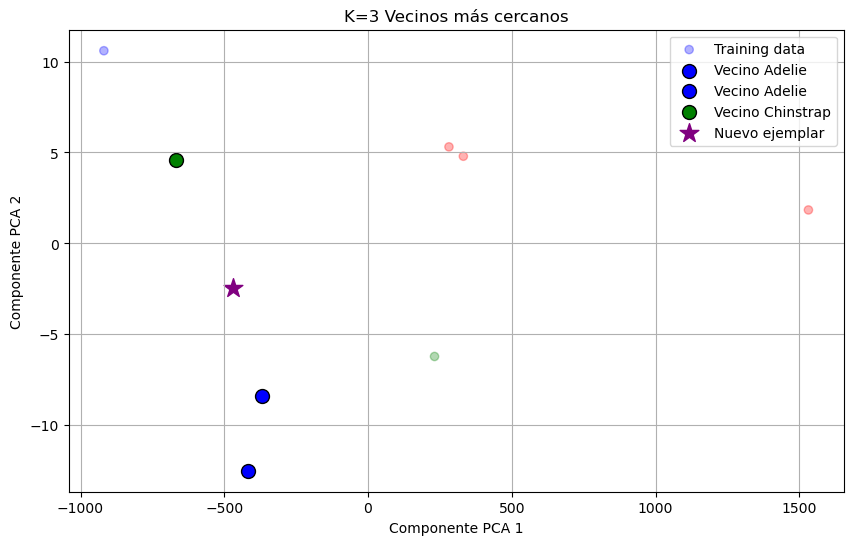

In [1]:
import numpy as np
from abc import ABC, abstractmethod
from collections import Counter

class KNNBase(ABC):
    """Clase abstracta base para el algoritmo KNN"""
    
    @abstractmethod
    def fit(self, X, y):
        """Almacena los datos de entrenamiento"""
        pass
    
    @abstractmethod
    def distance(self, p1, p2):
        """Calcula la distancia entre dos puntos"""
        pass
    
    @abstractmethod
    def predict(self, X_new, k=3):
        """Predice la clase para nuevos datos"""
        pass


class KNNClassifier(KNNBase):
    """Implementación concreta del clasificador KNN"""
    
    def __init__(self):
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """Almacena las observaciones de entrenamiento"""
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    
    def distance(self, p1, p2):
        """Calcula la distancia euclidiana entre dos puntos"""
        return np.sqrt(np.sum((p1 - p2)**2))
    
    def predict(self, X_new, k=3):
        """Predice la clase para nuevos datos basado en los k vecinos más cercanos"""
        if self.X_train is None or self.y_train is None:
            raise ValueError("El modelo no ha sido entrenado. Llame a fit() primero.")
            
        predictions = []
        for x in X_new:
            # Calcula distancias a todos los puntos de entrenamiento
            distances = [self.distance(x, x_train) for x_train in self.X_train]
            
            # Obtiene los índices de los k vecinos más cercanos
            k_indices = np.argsort(distances)[:k]
            
            # Obtiene las etiquetas de los k vecinos más cercanos
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            # Encuentra la etiqueta más común
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        
        return np.array(predictions)
    
    def __eq__(self, other):
        """Dos ejemplares son iguales si tienen exactamente las mismas medidas"""
        if not isinstance(other, KNNClassifier):
            return False
        return np.array_equal(self.X_train, other.X_train) and np.array_equal(self.y_train, other.y_train)
    
    def __add__(self, other):
        """Combina dos listas de ejemplares en un único conjunto de entrenamiento"""
        if not isinstance(other, KNNClassifier):
            raise TypeError("Solo se pueden combinar instancias de KNNClassifier")
            
        combined = KNNClassifier()
        if self.X_train is None:
            combined.X_train = other.X_train
            combined.y_train = other.y_train
        elif other.X_train is None:
            combined.X_train = self.X_train
            combined.y_train = self.y_train
        else:
            combined.X_train = np.concatenate((self.X_train, other.X_train))
            combined.y_train = np.concatenate((self.y_train, other.y_train))
        return combined
    
    def __repr__(self):
        """Representación legible del clasificador"""
        return f"KNNClassifier(training_samples={len(self.X_train) if self.X_train is not None else 0})"
    
    
def fit(self, X, y):
    """Almacena y normaliza las observaciones de entrenamiento."""
    self.X_train = np.array(X)
    self.y_train = np.array(y)
    # Normalización (escalado Z-score)
    self.mean = np.mean(self.X_train, axis=0)
    self.std = np.std(self.X_train, axis=0)
    self.X_train = (self.X_train - self.mean) / self.std

def predict(self, X_new, k=3):
    """Predice la clase para nuevos datos normalizados."""
    if self.X_train is None or self.y_train is None:
        raise ValueError("El modelo no ha sido entrenado. Llame a fit() primero.")
    
    X_new = (np.array(X_new) - self.mean) / self.std  # Normalizar nuevos datos
    predictions = []
    for x in X_new:
        distances = np.sqrt(np.sum((x - self.X_train)**2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)
    
    
# Datos de ejemplo (simulando el dataset penguins)
# En una implementación real, se cargarían los datos reales
X_train = np.array([
    [39.1, 18.7, 181, 3750],  # Adelie
    [39.5, 17.4, 186, 3800],   # Adelie
    [40.3, 18.0, 195, 3250],   # Adelie
    [46.1, 13.2, 211, 4500],   # Gentoo
    [50.0, 16.3, 230, 5700],   # Gentoo
    [48.7, 14.1, 210, 4450],   # Gentoo
    [46.5, 17.9, 192, 3500],   # Chinstrap
    [45.4, 14.6, 198, 4400],   # Chinstrap
])

y_train = np.array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap'])

# Nuevos datos a predecir
X_new = np.array([
    [40.5, 17.5, 190, 3700],
    [47.0, 15.0, 205, 5000],
    [45.0, 16.0, 195, 4000]
])

# Crear y entrenar el modelo
knn = KNNClassifier()
knn.fit(X_train, y_train)

# Probar con diferentes valores de k
for k in [1, 3, 5]:
    predictions = knn.predict(X_new, k=k)
    print(f"\nPredicciones con k={k}:")
    for i, pred in enumerate(predictions):
        print(f"Ejemplar {i+1}: {pred}")
        
        
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class KNNClassifier(KNNClassifier):  # Extendemos la clase anterior
    def plot_neighbors(self, x_new, k=3):
        """Visualiza los k vecinos más cercanos en un plano 2D usando PCA"""
        if self.X_train is None or self.y_train is None:
            raise ValueError("El modelo no ha sido entrenado. Llame a fit() primero.")
            
        # Reducción de dimensionalidad con PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(self.X_train)
        x_new_pca = pca.transform([x_new])
        
        # Encontrar k vecinos más cercanos
        distances = [self.distance(x_new, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:k]
        
        # Configurar colores por especie
        color_map = {'Adelie': 'blue', 'Gentoo': 'red', 'Chinstrap': 'green'}
        colors = [color_map[label] for label in self.y_train]
        
        # Graficar
        plt.figure(figsize=(10, 6))
        
        # Todos los puntos de entrenamiento
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.3, label='Training data')
        
        # Vecinos más cercanos
        for i in k_indices:
            plt.scatter(X_pca[i, 0], X_pca[i, 1], c=colors[i], edgecolors='black', s=100, 
                       label=f'Vecino {self.y_train[i]}')
        
        # Nuevo punto
        plt.scatter(x_new_pca[0, 0], x_new_pca[0, 1], c='purple', marker='*', s=200, 
                   label='Nuevo ejemplar')
        
        plt.title(f'K={k} Vecinos más cercanos')
        plt.xlabel('Componente PCA 1')
        plt.ylabel('Componente PCA 2')
        plt.legend()
        plt.grid()
        plt.show()

# Ejemplo de uso
knn_visual = KNNClassifier()
knn_visual.fit(X_train, y_train)
knn_visual.plot_neighbors(X_new[0], k=3)